In [ ]:
#References: 
#https://www.kaggle.com/prabhat12/fruits-image-classification-using-keras 
##https://www.kaggle.com/jnelson790612/fruit-360-transfer-learning


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend, models, layers, optimizers
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import backend, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow as tf
import os
import cv2
from sklearn import preprocessing
from pathlib import Path

In [2]:
# storing labels for train test
l_train = []
l_test = []

# storing path for train test
pTrain = []
pTest = []

In [3]:
train_path = "C:\\Users\\LeonFremz\\artificialNN\\train_zip\\train\\"
test_path = "C:\\Users\\LeonFremz\\artificialNN\\test_zip\\test"

for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        l_train.append(filename.split('_')[0])
        pTrain.append(os.path.join(train_path, filename))

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        l_test.append(filename.split('_')[0])
        pTest.append(os.path.join(test_path, filename))


check_label_train= np.unique(np.array(l_train))
check_label_test= np.unique(np.array(l_test))


print("The labels for train are: ", check_label_train)
print("No. of jpg images in train are: ", len(pTrain))

print("\nThe labels are for test are: ", check_label_test)
print("No. of jpg images for train are: ", len(pTest))

The labels for train are:  ['apple' 'banana' 'mixed' 'orange']
No. of jpg images in train are:  240

The labels are for test are:  ['apple' 'banana' 'mixed' 'orange']
No. of jpg images for train are:  60


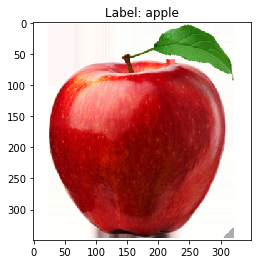

In [4]:
img = cv2.imread(pTrain[0])

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + l_train[0])
#plt.axis('on')
plt.show()

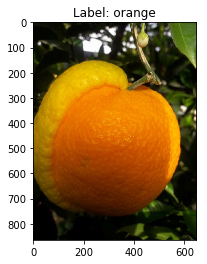

In [5]:
img = cv2.imread(pTest[50])

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + l_test[50])
#plt.axis('off')
plt.show()

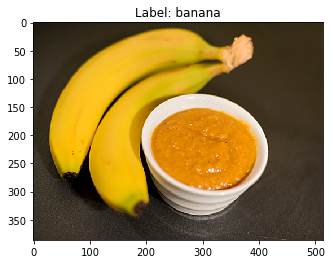

In [6]:
img = cv2.imread(pTrain[80])

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + l_train[80])
#plt.axis('off')
plt.show()

In [7]:
XTrain = []

for path in pTrain:
    
    img = cv2.imread(path)
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    final_img =  cv2.resize(rgb_img, (50,50))
    
    XTrain.append(final_img)

XTrain = np.array(XTrain)

In [8]:
XTest = []

for path in pTest:
    
    img = cv2.imread(path)
    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    final_img =  cv2.resize(rgb_img, (50,50))
    
    XTest.append(final_img)

XTest = np.array(XTest)

In [9]:
fruits = {}

for i in range(len(check_label_train)):
    fruits[check_label_train[i]] = i
    
fruits   

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [10]:
# storing the values in a temporary list
temp_train = []
temp_test = []

# all the fruits names are being mapped
for label in l_train:
    temp_train.append(fruits.get(label))

for label in l_test:
    temp_test.append(fruits.get(label))

print("Number of train data: ", len(temp_train))
print("Number of test data: ", len(temp_test))

Number of train data:  240
Number of test data:  60


In [11]:
## one-hot encoding using keras' numpy-related utilities
n_classes = 4
yTrain = keras.utils.to_categorical(temp_train, 4)
print("Shape before one-hot encoding: ", yTrain.shape)

yTest = keras.utils.to_categorical(temp_test, 4)
print("Shape after one-hot encoding: ", yTrain.shape)

Shape before one-hot encoding:  (240, 4)
Shape after one-hot encoding:  (240, 4)


Length of X_train:  240


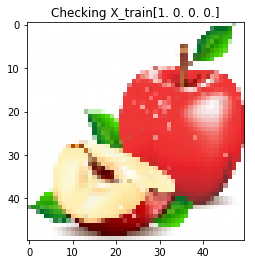

In [12]:
print("Length of X_train: ", len(XTrain))
plt.imshow(XTrain[34])
plt.title("Checking X_train"+str(yTrain[34]))
plt.show()

Length of X_test:  60


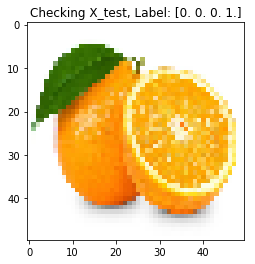

In [13]:
print("Length of X_test: ", len(XTest))
plt.imshow(XTest[45])
plt.title("Checking X_test, Label: " + str(yTest[45]))
plt.show()

In [14]:
XTrain = XTrain.astype('float32')
XTest = XTest.astype('float32')
XTrain /= 255
XTest /= 255

In [15]:
#checks the shape of the dataset

print("X_train shape: ", XTrain.shape)
print("X_test shape: ", XTest.shape)

print("\ny_train shape: ", yTrain.shape)
print("y_test shape: ", yTest.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [16]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(50, 50, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)
history= model.fit(XTrain, yTrain, batch_size=32, epochs=10, validation_data=(XTest, yTest) )
model.summary()

Epoch 1/10
8/8 [==============================] - 9s 926ms/step - loss: 1.4396 - accuracy: 0.2829 - val_loss: 1.2947 - val_accuracy: 0.4167
Epoch 2/10
8/8 [==============================] - 3s 375ms/step - loss: 1.2796 - accuracy: 0.3942 - val_loss: 1.1239 - val_accuracy: 0.5167
Epoch 3/10
8/8 [==============================] - 3s 410ms/step - loss: 1.0893 - accuracy: 0.5509 - val_loss: 0.8252 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 3s 414ms/step - loss: 0.7361 - accuracy: 0.6881 - val_loss: 0.8391 - val_accuracy: 0.8167
Epoch 5/10
8/8 [==============================] - 3s 411ms/step - loss: 0.6519 - accuracy: 0.7672 - val_loss: 0.6778 - val_accuracy: 0.8833
Epoch 6/10
8/8 [==============================] - 4s 562ms/step - loss: 0.5661 - accuracy: 0.7896 - val_loss: 0.5603 - val_accuracy: 0.8833
Epoch 7/10
8/8 [==============================] - 4s 531ms/step - loss: 0.4893 - accuracy: 0.8701 - val_loss: 0.5407 - val_accuracy: 0.9000
Epoch 8/10
8/8 [====

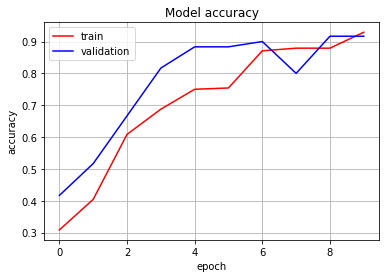

In [17]:
# displaying the model accuracy
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.show()

In [18]:
accuracy = model.evaluate(XTrain, yTrain)

8/8 [==============================] - 1s 127ms/step - loss: 0.1712 - accuracy: 0.9542


In [19]:
#test the model

test_eval = model.evaluate(XTest, yTest, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.44743674993515015
Test accuracy: 0.9166666865348816


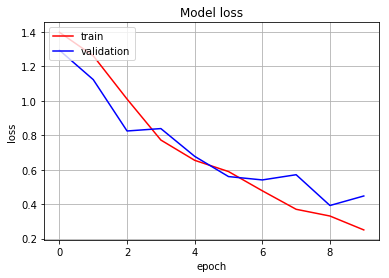

In [20]:
# displaying the model loss
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

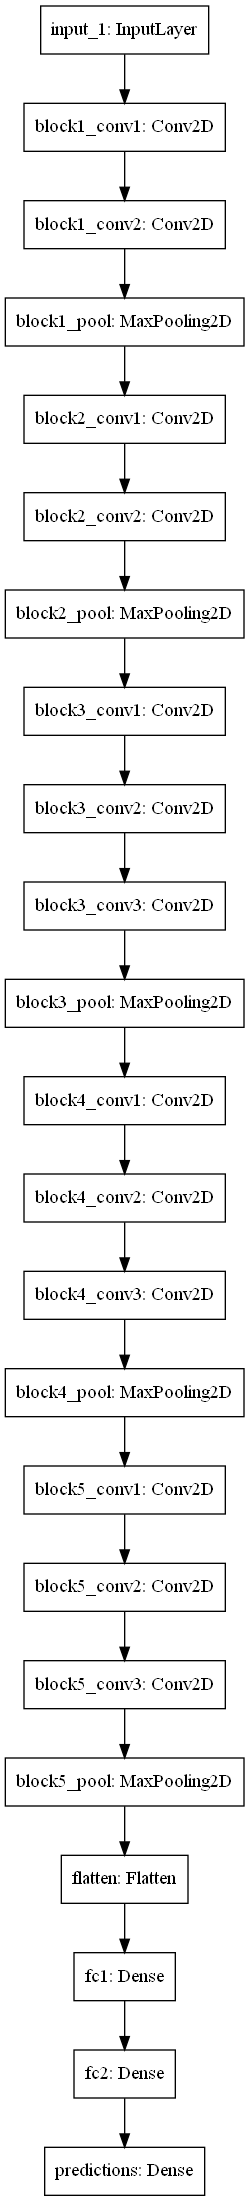

In [21]:
from keras.applications.vgg16 import VGG16
from keras.utils import  plot_model
model = VGG16()
plot_model(model)

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,# The image augmentaion function in Keras
    shear_range=0.2,
    zoom_range=0.2, # Zoom in on image by 20%
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(50, 50),
    batch_size=32,
    class_mode='categorical')


Found 0 images belonging to 0 classes.


In [24]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(50, 50),
    batch_size=32,
    class_mode='categorical')

Found 0 images belonging to 0 classes.


In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
backend.clear_session()
conv_based = InceptionV3(weights = 'imagenet', include_top = False)

In [26]:
InceptionV3_model = conv_based.output 
pool = GlobalAveragePooling2D()(InceptionV3_model )
dense_1 = layers.Dense(512, activation = 'relu')(pool)
output = layers.Dense(4,activation = 'softmax')(dense_1)

import tensorflow as tf
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))
vgg_model.summary()



In [27]:
mInceptionV3 = models.Model(inputs=conv_based.input, outputs=output)
mInceptionV3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [28]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6425448118712103756
]


In [29]:
from keras import  models
base_model = VGG16(weights='imagenet')
model_VGG16 = models.Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)


In [30]:
import tensorflow as tf
with tf.device("/device:GPU:0"):
    
    history= model.fit(XTrain, yTrain, batch_size=64, epochs=15, validation_data=(XTest, yTest) )
    

Epoch 1/15


ValueError: in user code:

    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\LeonFremz\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer vgg16: expected shape=(None, 224, 224, 3), found shape=(None, 50, 50, 3)


In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
valLoss = history_dict['val_loss']
accuracyValues = history_dict['accuracy']
valAccuracy = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
#model.compile(optimizers, loss)

In [ ]:
k=list(history.history.keys())# access to dictionary keys
a=list(history.history.values())# access to dictionary keys
accuracy = a[3]
val_accuracy = a[1]
loss = a[2]
val_loss= a[0]
epochs = range(len(accuracy))

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
# Plot the training/validation loss
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, valLoss,'b', label = 'Validation loss')
plt.title('Validation loss on Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "grey",
                     "axes.edgecolor":  "grey"})

In [ ]:
# Plot the training/validation accuracy
import matplotlib.pyplot as plt

plt.plot(epochs, accuracyValues, 'bo', label = 'Train accuracy')
plt.plot(epochs, valAccuracy, 'b', label = 'Validation accuracy')
plt.title('Validation accuracy on Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "grey",
                     "axes.edgecolor":  "grey"})

In [ ]:
test_loss, test_acc = mInceptionV3.evaluate(test_generator)